# Mel Schwan, Stuart Miller, Justin Howard, Paul Adams
# Lab Three: Clustering, Association Rules, or Recommenders
## Capstone: Association Rule Mining, Clustering, or Collaborative Filtering

### Lab3 Project Requirments -
1. [Business understanding](#Businessunderstanding)
    1. [Describe the purpose of the data set you selected](#Assessthecurrentsituation)
    2. [Describe how you would define and measure the outcomes from the dataset](#CostBenefit)
    3. [How would you measure the effectiveness of a good prediction algorithm](#Desiredoutputs)
  
2. [Data Understanding](#Dataunderstanding)
    1. [Describe the meaning and type of data for each attribute in the data file](#Describedata)
    2. [Verify data quality: Explain any missing values, duplicate data, and outliers](#Datareport)
    3. [Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean](#Stats)
    4. [Visualize the most important attributes appropriately (at least 5 attributes)](#Distributions)
    5. [Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate](#Correlations)
    6. [Identify and explain interesting relationships between features and the class you are trying to predict](#relationships)
    7. [Are there other features that could be added to the data or created from existing features? Which ones?](#Featurecreation)
    8. [Outlier Removal](#OutlierRemoval)

3. [Modeling and Evaluation](#Model)
    1. [Cluster Analysis](#Cluster)
        1. [K-Means on PCA](#KMPCA)
        2. [UMAP Projections](#UMAP)
        3. [Singular Vector Decomposition](#SVD)
        4. [Random Forest Leaf Embeddings](#RF)
        5. [Autoencoder Embeddings](#Autoencoder)
    
4. [Deployment](#Deployment)
    1. [How useful is your model for interested parties? ](#Useful)
    2. [How would you measure the model's value if it was used by these parties?](#Value)
    3. [How would your deploy your model for interested parties?](#Deploy)
    4. [How often would your model need to be updated?](#Update)
    5. [What other data should be collected? ](#Collect)

A1. [Model Hyperparameter Tuning Details](#A2)


Our project will follow a hybrid methodology, mixing the expectations of the grading rubric with the CRISP_DM framework. CRISP-DM stands for the cross-industry process for data mining, which provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.

We are continuing the data cleaning and preperation loop for preparing the dataset for cluster analysis.

In the final we have choosen to test different models for clustering of our dataset. The two approaches we have taken are
* [Model A: KMeans Clustering](#KMeans)
* [Model B: t-SNE Clustering](#t-SNE)


<img src="../_images/crisps-dm3.png" style="width:550px;height:450px"/>


# 1. Stage One - Business Understanding  <a class="anchor" id="Businessunderstanding"></a>
We will use the Home Credit Default Risk dataset made available on Kaggle to develop a useful model that predicts loan defaults for a majority of the loan applicants whose population is defined by the given training and test datasets. Predicting loan defaults is essential to the profitability of banks and, given the competitive nature of the loan market, a bank that collects the right data can offer and service more loans. This analysis of Home Credit's Default Risk dataset will focus on generating accurate loan default risk probabilities, identifying sub-populations among the given applicants, and finally, the most critical factors that indicate that an applicant will likely default on their loan.

## 1.1 Assess the Current Situation (Q1A)<a class="anchor" id="Assessthecurrentsituation"></a>
Home Credit is an international non-bank financial institution that operates in 10 countries and focuses on lending to people with little or no credit history. This institution has served 11 million customers, is based in the Czechia, and is a significant consumer lender in most of the Commonwealth of Independent States Countries, especially Russia. Recently, it has established a presence in China and the United States. The dataset provided is extensive, representing 307,511 applications from various locations. 

The data types vary in scale and type, from time-series credit histories to demographic indicators. Our cluster analysis will focus on two previously assembled datasets consisting of records agglomerated by the feature's respective mean or median, and several engineered features gathered from the millions of credit bureau records for each loan applicant.

### 1.1.2. Measuring the effectiveness of a good algorithm- <a class="anchor" id="Requirements"></a> 
#### 1. Effective Clustering Metric: Cluster Validity

The raw dataset, `data`, contains 329 attributes for 307,511 loan applicants and a normalized dataset, `data_std`, consists of 260 attributes for the same 307,511 records. We seek to explore the data to find meaningful clusters using as much of the available data as possible. Our dataset is substantial in size, which presents time and memory constraints that we will address throughout the analysis. 

The size of the data reduces the available clustering options to those that are capable of handling large datasets. Attempts to use spectral clustering and agglomerative hierarchical clustering on the entire dataset were abandoned due to the time-complexity of those algorithms. K-Means and HDBSCAN are implemented in the analysis, with an implementation of hierarchical agglomerative clustering on 2 dimensions of an embedding of the dataset that is downsampled by 75%. 

   - We have selected the silhouette score as a primary means to describing cluster validity. The silhouette score will be optimized while maintaining a balance between the number of clusters and the membership of each cluster.
   
        - A secondary cluster validity metric that will be used is HDBSCAN's built-in cluster persistence metric. This metric was during the supervised parameter tuning process to optimize the algorithm.
        
   - Our primary clustering algorithm is HDBSCAN, a density-based clustering algorithm.

**Business success criteria**

- Identify a reasonable number of meaningful clusters whose membership is large enough to represent a reasonable designation as a sub-population and use them to describe the characteristics of the customers that compose them.

**Data mining success criteria**

- Discover an optimal process for projecting our high dimensional dataset to two dimensions while losing as little information as possible.

#### 2. Effective Association Rule Determination

- **Business success criteria**

- **Data mining success criteria**


# 2. Stage  Two - Data Understanding <a class="anchor" id="Dataunderstanding"></a>


## 2.1 Initial Data Report (Q2) <a class="anchor" id="Datareport"></a>

In [ ]:
# Import Libraries Required.
from os import path
import pickle

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from IPython.display import IFrame

# some defaults
pd_max_rows_default = 60

import umap
import hdbscan

from sklearn import mixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, f1_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from mlxtend.frequent_patterns import fpgrowth
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import math
from mlxtend.frequent_patterns import fpgrowth

# import custom code
from project_code.cleaning import read_clean_data, missing_values_table, load_bureau, create_newFeatures, fill_occupation_type
from project_code.tables import count_values_table
from project_code.clustering import AutoEncoder
from project_code.random_forest import TreeImportances

#removing warnings
import warnings
warnings.simplefilter('ignore')

# random setting
random_state = 42

In [2]:
# load the data
    
# original data with no transformations
data = pd.read_csv('../_data/cluster_data.csv')

# normalized data for clustering
data_std = pd.read_csv('../_data/std_df.csv')

In [3]:
data = pd.read_csv('../notebooks/cluster_data.csv')

# normalized data with most important features
data_std = pd.read_csv('../notebooks/std_df.csv')

print('Raw data shape: ', data.shape,
      '\nNormalized data shape: ', data_std.shape)

Raw data shape:  (307511, 329) 
Normalized data shape:  (307511, 260)


## 2.2 Verify data quality: Explain any missing values, duplicate data, and outliers (Q2B) <a class="anchor" id="Datareport"></a>

To conduct the cluster analysis, we will use two cleaned datasets, `data` and `data_std`. 

**data** contains the raw data with all variables gained from the original agglomeration of the Kaggle Home Credit Default Risk dataset and the previously identified features engineered by our team in Labs 1 and 2. 

**data_std** contains only the features that were deemed most important im Lab 2. These features were arrived at by finding the mean absolute value of the coefficients assigned to each feature to by a the Logistic Regression model with L1 and L2 regularization. 

Each dataset contains a mixture of continous and one-hot encoded features. All missing values were imputed by median or mean values, where appropriate.

# 3. Stage  Three - Modeling and Evaluation <a class="anchor" id="Model"></a>

## 3.1 Option A: Cluster Analysis (Q3A) <a class="anchor" id="Cluster"></a>



Our cluster analysis will focus primarily on comparing embedding and dimensionality reduction methods to observe their strengths and weaknesses for our dataset. The metric that we will use to compare our methods with will be the silhouette score. We will begin with a traditional approach of reducing the dimensionality of the dataset with Principal Component Analysis, then we will conduct a K-Means clustering on a reasonable number of principal components.  

## 3.1.1 K-Means on PCA <a class="anchor" id="KMPCA"></a>

### Dimensionality Reduction

Since clustering scales poorly as the size of data inceases, we will first attempt for reduce the number of features first with PCA.
PCA is performed on the entire `data_std` dataset because this dataset is normalized and reduced to only the features that were most important to the regularized Logistic Regression model.

#### Selecting the Optimal Number of Components: Variance Explained

The following plots show that approximate 50-75 components of the PCA should be sufficient to explain the majority of the data variance.
We find that on average 50 components are sufficent to explain 95% of the variance.
Substantially more components are necessary to explain 99% percent of the variance,
approximate 87 components on average.
The increase in expained variance increases slowly with increase in components after 50.
We will continue the analysis using 50 components.

| Variance Explained | N Components |
|:------------------:|:------------:|
| 80%                | 25 |
| 85%                | 29 | 
| 90%                | 36 |
| 95%                | 50 |
| 99%                | 87 |

Note: 200 components were used in the PCA decomposition because approximately 200 was suggested by Minka’s MLE method for estimating the size of the dimension.

In [ ]:
pca = PCA(n_components = 200,
          random_state = random_state)
pca.fit(data_std)

Number of components necessary to achieve 80.0% explained variance is 28
Number of components necessary to achieve 85.0% explained variance is 32
Number of components necessary to achieve 90.0% explained variance is 38
Number of components necessary to achieve 95.0% explained variance is 51
Number of components necessary to achieve 99.0% explained variance is 88





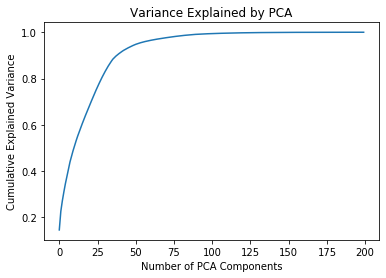

In [85]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.title('Variance Explained by PCA')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of PCA Components')

amounts = [0.8, 0.85, 0.9, 0.95, 0.99]

for explained_var in amounts:
    n_comp = pca.explained_variance_ratio_[np.cumsum(pca.explained_variance_ratio_) 
                                           < explained_var].size
    print(f"Number of components necessary to achieve {explained_var * 100}% \
explained variance is {n_comp}")
print('\n\n')

### Downsampling

Due to the computational intensity associated with silhouette score calculations, the PCA dataset is downsampled to approximately 25% of its original size before the silhouette score is calculated.

In [93]:
pca_data = data_std.sample(frac = 0.25,
                           replace = False,
                           random_state = random_state)
pca = PCA(n_components = 200,
          random_state = random_state)
pca_data = pca.fit_transform(pca_data)

In [94]:
k_values = np.arange(2, 51, 1)
inert = np.empty_like(k_values, dtype = 'float')
sil = np.empty_like(k_values, dtype = 'float')

for i, k in enumerate(k_values):
    km = KMeans(n_clusters = k)
    km.fit(pca_data[ : , : 51])
    inert[i] = km.inertia_
    sil[i] = silhouette_score(pca_data, km.labels_)

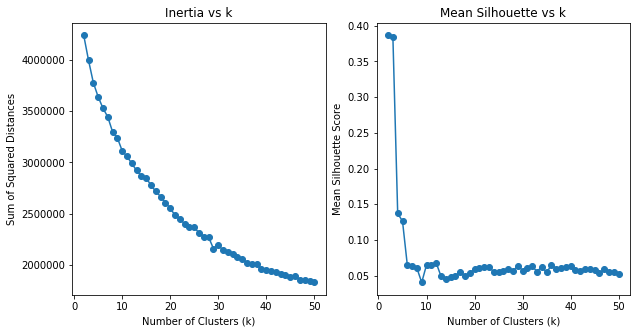

In [95]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].plot(k_values, inert, marker = 'o')
ax[0].set_title('Inertia vs k')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Sum of Squared Distances')
ax[1].plot(k_values, sil, marker = 'o')
ax[1].set_title('Mean Silhouette vs k');
ax[1].set_ylabel('Mean Silhouette Score')
ax[1].set_xlabel('Number of Clusters (k)');

**Significant Findings**

A silhouette analysis of K-Means clustering with k from 2 to 50 shows low confidence in k-means ability to produce valid clusterings.
The maximum  silhouette score is at k = 2.
The score drops by about 50% when k is increased from 3 to 4.
The mean silhouette score drops dramatically with increase in k, essentially flattening at a score of approximately 0.05 at k = 6.

This does not provide confidence that K-Means is able to capture meaningful structure within the data. Moving forward, we will explore the effectiveness of clusters formed using HDBSCAN on a novel approach to projecting high-dimensional data down to two dimensions, Uniform Manifold Approximation and Projection (UMAP)

## 3.1.2 UMAP Projections <a class="anchor" id="UMAP"></a>

UMAP is a dimensionality reduction method whose primary value is the visualization of clusters. UMAP is similar to t-SNE in that their shared strength is their ability to expand the distances between dissimilar clusters of data. UMAP is superior to t-SNE in that UMAP projections maintain meaningful distances within clusters, making it possible to use UMAP projections for clustering. Although the practice of forming clusters directly from UMAP projections remains controversial due to the algorithm's use of random sampling from data sets to form Reimannian Manifolds, it will be attempted here in an exploratory fashion.

### UMAP Embedding of 50 Principal Components

The first alternative to using K-Means directly on 50 Principal Components is using HDBSCAN on a 2 dimensional UMAP embedding of the 50 principal components. 

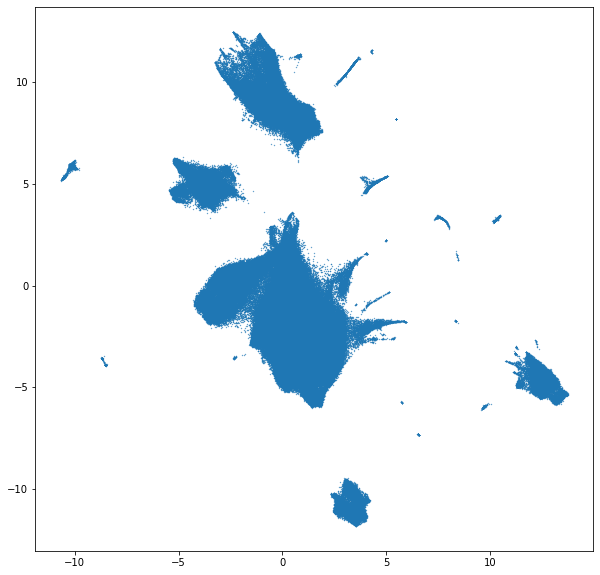

In [11]:
results = pickle.load(open('umap_results.sav', 'rb'))
plt.figure(figsize = (10,10))
plt.scatter(results[:, 0], results[:, 1], s=0.1, cmap='Spectral')

The ability of UMAP to minimize the distance between similar points and maximize the distance between dissimilar points is clearly evident. 

HDBSCAN will be used to for meaningful clusters. HDBSCAN's built in validity metric, cluster persistence, will be used to tune the hyperparameters and the cluster validity will be assessed using its silhouette score.

In [12]:
hdbscan_labels = dict()
sizes = [3500]
#samples = range(190, 290, 10)
persistences = dict()
#=====================================
for i in sizes:
    clusterer = hdbscan.HDBSCAN(metric = 'euclidean',
                                min_cluster_size = i,
                                min_samples = 500
                                ).fit(results)
    hdbscan_labels[i] = clusterer.labels_
    persistences[i] = clusterer.cluster_persistence_

The `min_cluster_size` and `min_samples` parameters were selected through an iterative process of elimination based on maximizing the cluster persistence metric while achieving a reasonable balance of cluster membership.

In [8]:
def plot_clusters(embedding, labels, s = 0.5, figsize = (10,10)):
    """Plot a 2D embedding
    """
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))
    plt.figure(figsize = figsize)
    plt.scatter(embedding[:, 0], embedding[:, 1], c = palette[labels], s = s);
    

Average cluster persistence: 0.5977655441515363


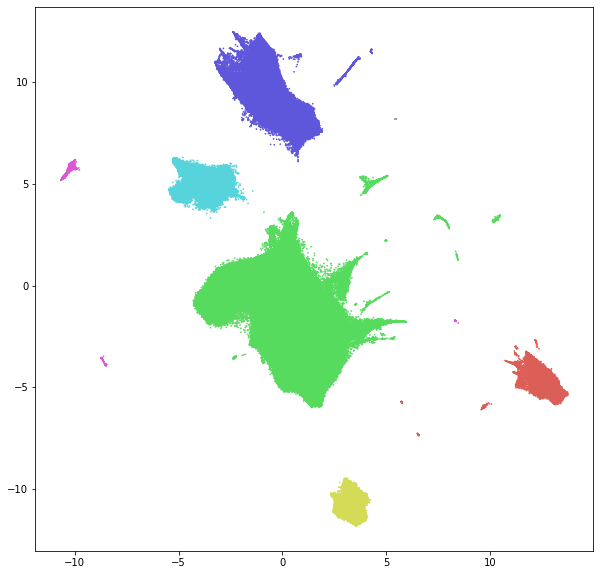

In [54]:
    
for i, (j,k) in enumerate(hdbscan_labels.items()):
    plot_clusters(results, hdbscan_labels[j]),
    print('Average cluster persistence:', 
          sum(persistences[j]) / len(persistences[j]))
    

In [55]:
PCA_score = silhouette_score(results, hdbscan_labels[3500])

In [20]:
unique, counts = np.unique(hdbscan_labels[3500], return_counts = True)
print(np.asarray((unique,counts)).T)

[[    -1   2638]
 [     0  17344]
 [     1  14256]
 [     2 189623]
 [     3  29027]
 [     4  54623]]


In [56]:
print('Silhouette Score of Clusters from a UMAP Embedding of 50 PCs : ', PCA_score)

Silhouette Score of Clusters from a UMAP Embedding of 50 PCs :  0.5910448


Both HDBSCAN's built-in cluster persistence metric, which returns a score of .59 on a scale from 0 to 1, and the silhouette metric, which returns a score of .59, agree that the clusters are relatively valid. 

We previously mentioned that forming clusters on UMAP results is controversial and we have produced an additional UMAP embedding of the 50 pcincipal components to demonstrate why. The UMAP algorithm randomly samples from the data it is given to assess the distributions within the data and build the manifolds it uses to calculate distances between points. The random nature of the process results in different projections of the same data.


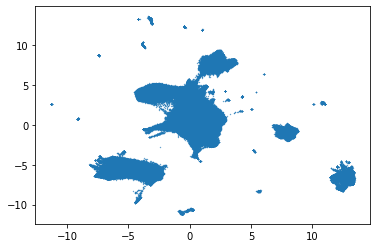

In [4]:
pca = PCA(n_components = 50,
          random_state = random_state)
pca_data = pca.fit_transform(data_std)

PCA_umap2 = umap.UMAP(random_state = random_state).fit_transform(data_std)

plt.subplots(1,1,2)
plt.scatter(PCA_umap2[:, 0], PCA_umap2[:, 1], s=0.1, cmap='Spectral')

In [13]:
sizes = [3500]
hdbscan_labels2 = dict()
persistences = dict()
for i in sizes:
    clusterer = hdbscan.HDBSCAN(metric = 'euclidean',
                                min_cluster_size = i,
                                min_samples = 500
                                ).fit(PCA_umap2)
    hdbscan_labels2[i] = clusterer.labels_
    persistences[i] = clusterer.cluster_persistence_

In [17]:
unique, counts = np.unique(hdbscan_labels2[3500], return_counts = True)
print(np.asarray((unique, counts)).T)

[[    -1   3349]
 [     0  16615]
 [     1  56654]
 [     2  30501]
 [     3  15217]
 [     4  35417]
 [     5  29249]
 [     6 120509]]


Average cluster persistence: 0.6080222727124592


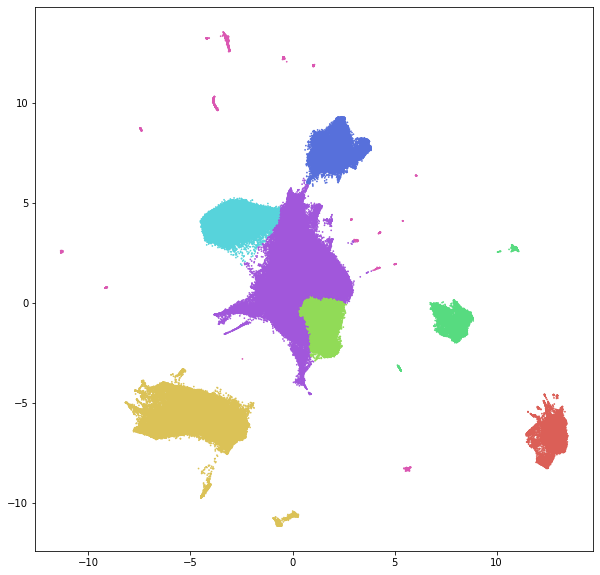

In [10]:
for i, (j,k) in enumerate(hdbscan_labels2.items()):
    plot_clusters(PCA_umap2, hdbscan_labels2[j]),
    print('Average cluster persistence:', 
          sum(persistences[j]) / len(persistences[j]))

In [19]:
from scipy.spatial.distance import hamming

print('The difference between the clusters of UMAP 1 and UMAP 2 using 50 Principal Componenets: ', 
      hamming(hdbscan_labels[3500], hdbscan_labels2[3500]))

The difference between the clusters of UMAP 1 and UMAP 2 using 50 Principal Componenets:  0.8448673380789631


**Significant Findings**

- **Additional tuning is necessary to reproduce the results of the first embedding.** 

The clustering on the first embedding produced 5 valid clusters. Conducting an HDBSCAN using the same parameters on a different UMAP embedding of the same data returned 6 clusters. 

The above visualization illustrates the controversial nature of using clustering techniques directly on UMAP projections. UMAP is a powerful tool for visualizing clusters, however, the projections it produces are dependent on a random process. The validity of clusters that are formed directly on UMAP projections is difficult to measure because the projections themselves are difficult to reproduce. Although the second UMAP projection produces 5 clusters upon a visual inspection, clustering is difficult to reproduce without a supervised process. 

To provide an additional metric to quantify how different the two labeling schemes are, the Hamming distance between the label sets was calculated. Since the Hamming distance is the bitwise difference between two vectors, it is deal for judging the similarity of two numeric label sets.

The hamming distance between the two label arrays is .844, which means that the label set produced by the first UMAP projection is approximately 84.4% different than the label set produced by the second UMAP projection.

## 3.1.3 Dimensionality Reduction using Singular Vector Decomposition<a class="anchor" id="SVD"></a>

The previous method of dimensionality reduction using PCA and HDBSCAN clustering produced a reasonable visualization, but metrics indicate that the clusters are difficult to reproduce in an unsupervised setting. An alternative method of dimensionality reduction, Singular Vector Decomposition, will be applied and the HDBSCAN clustering will be applied to the reduced dataset, then visualized with the assistance of a UMAP embedding. 

The advantage of Singular Vector Decomposition is that it is much more effective at reducing the dimensionality of a dataset, enabling cluster labeling without any downsampling. Singular Value Decomposition does not require the centering or normalization of a dataset, so the raw dataset, `data` will be used. 

Additionally, Singular Vector Decomposition does not rely on euclidean distances in the same way that PCA does. With this in mind, we will use the non-standardized dataset `data`

In [22]:
svd = TruncatedSVD(n_components = 200)
SVD_df = svd.fit_transform(data)

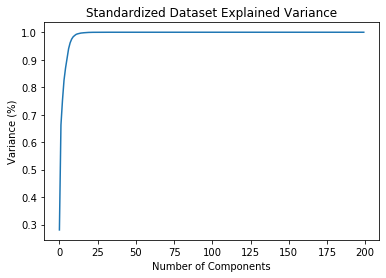

In [13]:
exp_var = np.cumsum(svd.explained_variance_ratio_)

plt.figure()
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Singular Vector Decomposition Explained Variance')
plt.show()

**Leskovic, Rajaramin, and Ullman suggest that when using SVD for dimensionality reduction, explaining 90% of the variance in the dataset is sufficient for cluster analysis. These guidlines can be found in the freely available "Mining of Massive Datasets" text.**

In [14]:
idx = np.where(exp_var >= .90)
print('Optimal Number of Principal Components: ', idx[0][0])

Optimal Number of Principal Components:  5


In [ ]:
SVD_df = np.array(SVD_df[:,:5])

In [21]:
SVD_umap = pickle.load(open('SVD_umap.sav', 'rb'))

In [17]:
SVD_umap = umap.UMAP(random_state = random_state).fit_transform(SVD_df)

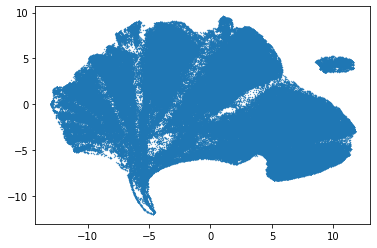

In [48]:
#plt.figure(figsize = (14,10))
plt.scatter(SVD_umap[:, 0], SVD_umap[:, 1], s=0.1, cmap='Spectral')

### Performing HDBSCAN on the SVD of the original dataset

A visual inspection reveals the presence of 6 possible clusters with noise points between them. Due to the limited repreducibility of clusterings formed on UMAP embeddings and the possibility of performing an HDBSCAN on the entire SVD dataset, we will perform the HDBSCAN on the five dimensions of the SVD_df dataset, then visualize the 5 dimensional clusters using this UMAP embedding. Since SVD is does not depend on random sampling, we are maximizing the reproducibility of the clusters. The price for this repreducibility is time. It took approximately six hours to perform an HDBSCAN on a 5 dimensional dataset of 307,511 records on a single CPU core. Had we distributed the calculations to more processors, this time can be reduced, but compared to alternatives, this method is still expensive.

In [23]:
hdbscan_labels = dict()
sizes = [280]
#samples = range(190, 290, 10)
persistences = dict()
#=====================================
for i in sizes:
    clusterer = hdbscan.HDBSCAN(metric = 'euclidean',
                                min_cluster_size = i,
                                min_samples = 200
                                ).fit(SVD_df)
    hdbscan_labels[i] = clusterer.labels_
    persistences[i] = clusterer.cluster_persistence_

Average cluster persistence: 0.14893300339865045


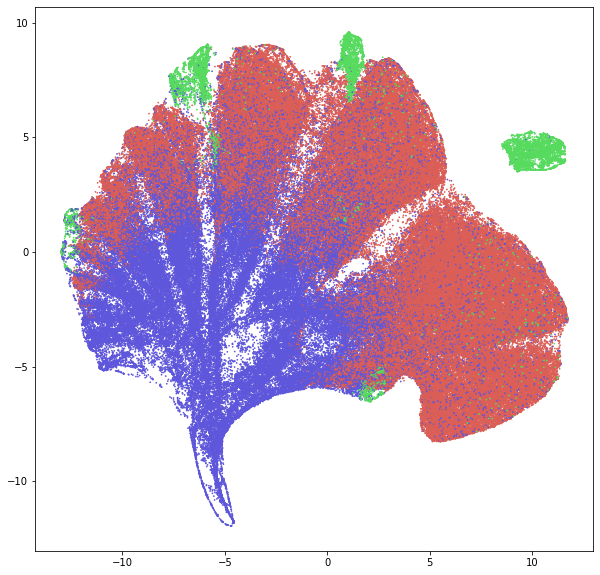

In [24]:
for i, (j,k) in enumerate(hdbscan_labels.items()):
    plot_clusters(SVD_umap, hdbscan_labels[j]),
    print('Average cluster persistence:', 
          sum(persistences[j]) / len(persistences[j]))

In [25]:
SVD_score = silhouette_score(SVD_umap, hdbscan_labels[280])

In [26]:
print('Silhouette Score of Clusters from a UMAP Embedding of 5 SVD Dimensions : ', SVD_score)

Silhouette Score of Clusters from a UMAP Embedding of 5 SVD Dimensions :  0.12235242


In [ ]:
file = 'HDBSCAN_SVD_labels.sav'
pickle.dump(hdbscan_labels[280], open(file, 'wb'))

In [27]:
unique, counts = np.unique(hdbscan_labels[280], return_counts = True)
print(np.asarray((unique, counts)).T)

[[    -1 107969]
 [     0 188768]
 [     1  10774]]


In [33]:
for i , j in enumerate(embeddings, hdbscan_labels):
    print()

dict_keys([280, 3500])

In [44]:
from sklearn.metrics import silhouette_samples
samples = silhouette_samples(SVD_umap, hdbscan_labels[280])

**Significant Findings**

Major Weakness of the method:

- HDBSCAN identifies only two valid clusters and 107,969 records as noise. Of the two identified clusters, one has 188,768 records while the other has 10,774 points.
- This method is very time consuming. The estimated time to run HDBSCAN is 8 hours with the n_jobs parameter set to 1. Due to the iterative nature of tuning HDBSCAN to the dataset, which demands a density-based clustering algorithm, this method is expensive if not performed on a distributed computing network.

Strengths:
- The clusters are formed using all of the records.
- 5 dimensions of the deomposed dataset explain 90% of the variance of the data.

Visually, the clustering lacks cohesion, but observable patterns are evident. The cluster persistence produced by HDBSCAN is low, at .148, while the silhouette metric is .122. The metrics, cluster membership, and visualization do not provide sufficient confidence that the clusters identified are useful. 

## 3.1.4 Random Forest Embedding<a class="anchor" id="RF"></a>

Due to the size of our dataset, we also explored alternative means of visualizing the models we use, such as decision trees. 

We selected the ExtraTreesClassifier, tuned it accordingly, and measured its effectiveness with a 5 fold cross validation that maximized the recall score. Using the built-in apply method, we assigned the leaves to an array. We embedded the leaf assignments using a UMAP projection of the Hamming distance between the leaves. This method proved useful for visualizing the results that a very large decision tree produces.  

In [27]:
#downsampling
defaults = data_std.query('TARGET == 1')
rest = data_std.query('TARGET ==0').sample(n = np.round(0.5 * (defaults.TARGET.size / 0.5)).astype(int),
                                                  random_state = random_state)
#re-joining and shuffling
downsampled = pd.concat([defaults, rest]).sample(frac = 1, 
                                                    random_state = random_state)

In [28]:
y_train = downsampled.TARGET.copy()
downsampled = downsampled.drop(labels = ['TARGET'], axis = 1)
et = ExtraTreesClassifier(n_estimators=100, 
                          min_samples_leaf=500, 
                          max_features=0.80,
                          bootstrap=True,
                          class_weight='balanced',
                          n_jobs=-1,
                          random_state = random_state)

In [29]:
print('5-fold cross validation results: ',cross_val_score(et, downsampled, y_train, cv = 5, scoring = 'recall', n_jobs = 6))

5-fold cross validation results:  [0.64471299 0.63826788 0.62437059 0.62416918 0.63383686]


In [32]:
y = pd.read_csv('y.csv')

In [33]:
et.fit(data_std, y.values.ravel())
leaves = et.apply(data_std)
print(leaves)

[[2 2 2 ... 2 2 3]
 [1 1 1 ... 1 1 5]
 [1 1 1 ... 1 1 2]
 ...
 [1 1 1 ... 1 1 5]
 [2 2 2 ... 2 2 6]
 [1 1 1 ... 1 1 5]]


In [4]:
rfumap = pickle.load(open('rf_umap.sav', 'rb'))

In [42]:
rf_umap = umap.UMAP(metric = 'hamming', random_state = random_state).fit_transform(leaves)

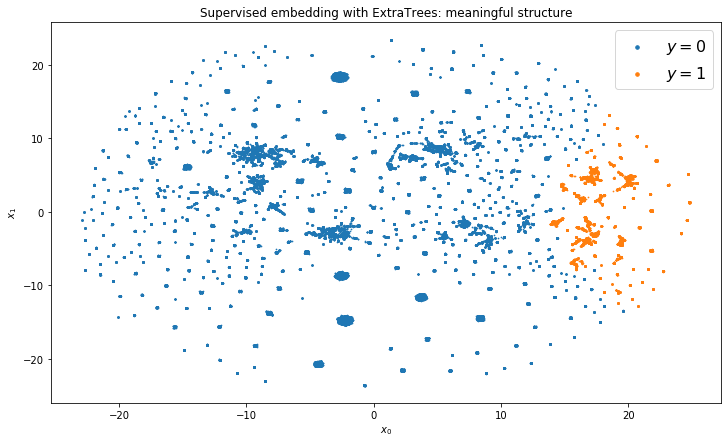

In [7]:
y = pd.read_csv('y.csv')
y = y.values.ravel()
plt.figure(figsize=(12,7))
plt.scatter(rfumap[y == 0,0], rfumap[y == 0,1], s=.5, c='C0', cmap='viridis', label='$y=0$')
plt.scatter(rfumap[y == 1,0], rfumap[y == 1,1], s=.5, c='C1', cmap='viridis', label='$y=1$')
plt.title('Supervised embedding with ExtraTrees: meaningful structure')
plt.xlabel('$x_0$'); plt.ylabel('$x_1$')
plt.legend(fontsize=16, markerscale=5)

**Significant Findings**

The UMAP algorithm provides a useful visualization of the dispersion of the results of a large decision tree. The loans that the ExtraTreesClassifier labeled as defaults are clearly separated from those that were labeled as not likely to default. This visualization is based on a decision tree that is capable of accurately predicting a defaulted application 62% to 64% of the time.

In [9]:
hdbscan_labels = dict()
persistences = dict()
sizes = [4250]
for i in sizes:
    clusterer = hdbscan.HDBSCAN(metric = 'euclidean',
                                min_cluster_size = i,
                                min_samples = 500
                                ).fit(rfumap)
    hdbscan_labels[i] = clusterer.labels_
    persistences[i] = clusterer.cluster_persistence_

Average cluster persistence: 0.58029160100781


<Figure size 864x504 with 0 Axes>

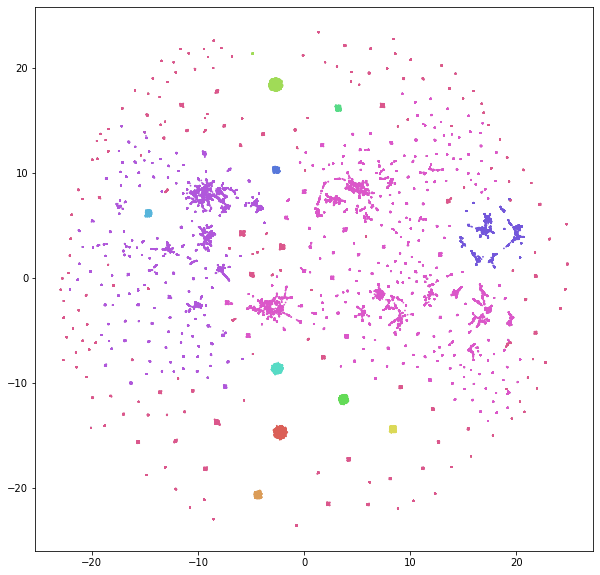

In [12]:
plt.figure(figsize=(12,7))
for i, (j,k) in enumerate(hdbscan_labels.items()):
    plot_clusters(rfumap, hdbscan_labels[j])
    print('Average cluster persistence:', sum(persistences[j]) / len(persistences[j]))

In [13]:
unique, counts = np.unique(hdbscan_labels[4250], return_counts = True)
print(np.asarray((unique, counts)).T)

[[   -1 80466]
 [    0 13849]
 [    1  6291]
 [    2  5669]
 [    3 14835]
 [    4  8086]
 [    5  4471]
 [    6 10333]
 [    7  5385]
 [    8  5186]
 [    9  7484]
 [   10 49297]
 [   11 96159]]


In [14]:
silhouette_score(rfumap, hdbscan_labels[4250])

-0.08316537

**Significant Findings**

- Embedding the results of a random forest using UMAP makes the visualization of very large decision trees possible.

- These visualizations may not result in valid clusters.

While the cluster persistence metric rated the clusters with a .58, the silhouette metric returned a -.08. We cannot verify the validity of these clusters, however because they are based on a decision tree whose accuracy is less than 70% and a difficult to reproduce UMAP projection.

## 3.1.5 Clustering on Autoencoder Embeddings <a class="anchor" id="Autoencoder"></a>

Cluster analysis in high dimensional data is difficult.
It has been shown that autoencoders can be used to compress datasets with large dimensionality into low dimensional embeddings.
An autoencoder works by passing the input data though a series of neural network hidden layers, which often contains a bottleneck layer.
Another series of hidden layers connect the bottleneck layer to an output layer with the same dimensionality as the input.
The autoencoder is trained with SGD to find a set of weights for the hidden layers to make the output predictions resemble the input data.
The identify function is assessed by the error in the reconstruction of the original data, typically measured with mean squared error (MSE).
If the MSE is low, the embeddings created by the autoencoder likely capture most of the variance in the data.

In this case, an autoencoder is used to compress the data with over 250 dimensions into two dimensions.
Since two dimensional data can be visualized effectively, this is aid in assessment of the cluster analysis.

In [3]:
ae = AutoEncoder(data.shape[-1], 2)
ae.fit(
    data_std,
    batch_size=10000,
    epochs=500,
    loss="mse",
    optimizer="adam",
    weights=None,
    verbose=0,
    weight_id=None,
    patience=None,
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


The reconstruction error (MSE) of the autoencoder over 500 training epoches is shown below.

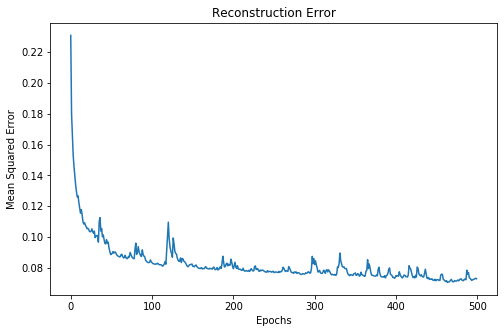

In [4]:
ae.plot_loss()

In [3]:
# reload pickled embeddings
autoendings_path = '../_pickles/autoencoder_embeddings'
print('Reloading saved embeddings from autoencoder')
with open(autoendings_path, 'rb') as pkl_file:
    vals = pickle.load(pkl_file)
# relaod random samples
autoendings_path = '../_pickles/autoencoder_embeddings_downsampled'
print('Reloading saved random selection')
with open(autoendings_path, 'rb') as pkl_file:
    ind_plot = pickle.load(pkl_file)

Reloading saved embeddings from autoencoder
Reloading saved random selection


#### Visualize the Embedding

The following plots show the 2 dimensional embedding representing the data.
The plot on the left shows the entire set, while the plot on the right shown the primary data near the center in more detail.

There appear to be well defined clusters and clusters that are more disperse.

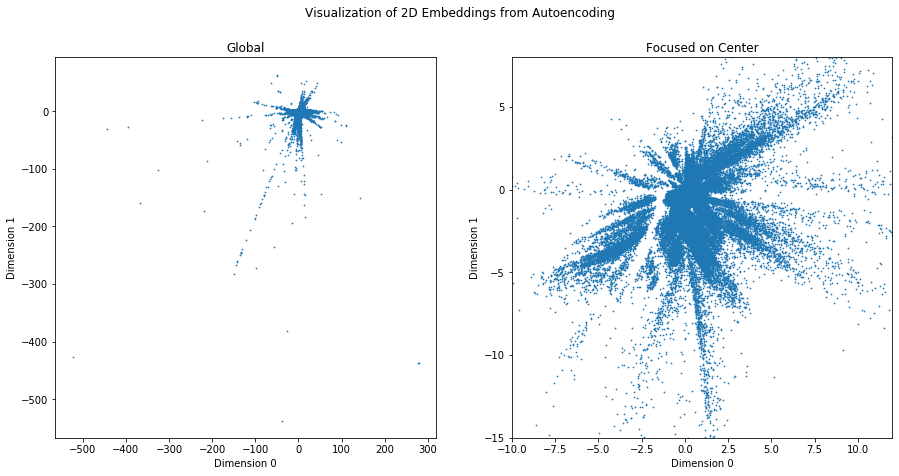

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7));
fig.suptitle('Visualization of 2D Embeddings from Autoencoding')
# visualize the full dimensions of the embeddings
ax[0].scatter(vals[:, 0], vals[:, 1], s = 0.5);
ax[0].set_xlabel('Dimension 0');
ax[0].set_ylabel('Dimension 1');
ax[0].set_title('Global');
# zoom in on the center
ax[1].scatter(vals[ind_plot, 0], vals[ind_plot, 1], s = 0.5);
ax[1].set_xlabel('Dimension 0');
ax[1].set_ylabel('Dimension 1');
ax[1].set_title('Focused on Center');
ax[1].set_xlim(-10,12)
ax[1].set_ylim(-15,8);

#### Clustering

**Agglomerative**

Agglomerative recusively mergers pairs of clusters that minimizes a given linkage.
In this case we cluster with ward linkage, which minimizes the variance of the clusters being merged.

In [32]:
# load a set of randomly selected indicies
# data was downsampled to 30k due to the memory requirements
with open('../_pickles/autoencoder_embeddings_downsampled_agglom', 'rb') as pkl_file:
    ind = pickle.load(pkl_file)

sizes = np.arange(2, 25, 1)
sil_scores = np.empty_like(sizes, dtype = 'float')

for i, n in enumerate(sizes):
    agglom = AgglomerativeClustering(n_clusters=n)
    sil_scores[i] = silhouette_score( 
        vals[ind , :],
        agglom.fit_predict(vals[ind , :])
    )
del agglom

There is a high silhouette score above `n_clusters = 5`, however, essentially only 1 cluster is actually chosen in these sets.
There appears to be an increase in mean silhouette score with increase in number of clusters,
but a smaller number of clusters may be useful for interpretation.

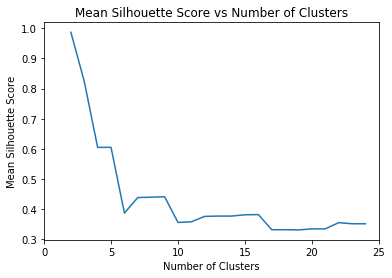

In [33]:
plt.plot(sizes, sil_scores);
plt.xlim((0,25));
plt.ylabel('Mean Silhouette Score');
plt.xlabel('Number of Clusters');
plt.title('Mean Silhouette Score vs Number of Clusters');

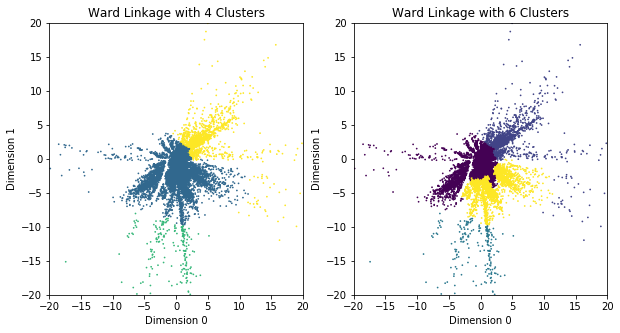

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
# fit for 4 clusters
aglom_4 = AgglomerativeClustering(n_clusters=4)
labels_4 = aglom_4.fit_predict(vals[ind , :])
del aglom_4
# fit for 6 clusters
aglom_6 = AgglomerativeClustering(n_clusters=6)
labels_6 = aglom_6.fit_predict(vals[ind , :])
del aglom_6
# plot the clustering for 4 clusters
ax[0].scatter(vals[ind , 0],vals[ind , 1], c = labels_4, s = 0.5)
ax[0].set_xlim((-20,20))
ax[0].set_ylim((-20,20))
ax[0].set_ylabel('Dimension 1')
ax[0].set_xlabel('Dimension 0')
ax[0].set_title('Ward Linkage with 4 Clusters')
# plot the clustering for 6 clusters
ax[1].scatter(vals[ind , 0],vals[ind , 1], c = labels_6, s = 0.5)
ax[1].set_xlim((-20,20))
ax[1].set_ylim((-20,20));
ax[1].set_ylabel('Dimension 1')
ax[1].set_xlabel('Dimension 0')
ax[1].set_title('Ward Linkage with 6 Clusters');

Based on the plots above, the clusters created by agglomerative clustering with ward lnkage do not appear to capture structure of the data.
Visually, there appear to be well defined 'lines' coming from the center of the data.
Agglomerative clustering does not appear to find these structures.
With other linkages, one cluster dominates, leaving the other clusters to capture noise.


**HDBSCAN**

HDBSCAN was used to create clusters.
HDBSCAN is a hierarchical based extension of DBSCAN.

Due computational complexity, only 80,000 random samples of the original data were used.
This is roughly 26.7% of the data.

In [5]:
# constuct object
scanner = hdbscan.HDBSCAN(min_cluster_size=40,
                          min_samples=5,
                          cluster_selection_epsilon = 0.025)
# fit and get labels from fit
scanner.fit(vals[ind_plot,:])
labels = scanner.labels_
# 
sampled = pd.DataFrame(data=vals[ind_plot,:],
                      columns=['one', 'two'])
sampled['labels'] = scanner.labels_
noise_count = sampled[sampled['labels'] == -1].count()[0]

print(f'There are {np.max(np.unique(labels))} clusters selected.')
print(f'Approximately {noise_count / ind_plot.size * 100:0.2f}% \
of the data is classified as noise.')
del scanner

There are 93 clusters selected.
Approximately 19.49% of the data is classified as noise.


HDBSCAN selects 93 clusters, which is too many clusters for our team to examine effectively.
We will combine clusters to make interpreting the clusters more tractable.
Clusters were combined by visual inspection, combining cluster with low membership with clusters with larger memebership that appeared to angled similarly in the two dimensional space.

In [6]:
# save off original for plotting
original_embed_clustering = sampled.copy()

# reduce clusters by manual combinations
sampled['labels'].replace([24,25], 15, inplace = True)
sampled['labels'].replace([10,13], 14, inplace = True)
sampled['labels'].replace([49, 56, 59, 58, 36, 37], 45, inplace = True)
sampled['labels'].replace([79, 80, 78, 55,91, 90,
                           98, 71, 47, 93, 92], 89, inplace = True)
sampled['labels'].replace([88, 87, 48, 39, 77, 76,
                           75, 72, 60, 41, 42, 40, 38,
                           69, 34, 33, 30, 31], 81, inplace = True)
sampled['labels'].replace([22, 23, 74], 81, inplace = True)
sampled['labels'].replace([65, 68, 67, 63, 62, 57, 50,
                           51, 44, 54, 46, 43, 35, 28], 70, inplace = True)
sampled['labels'].replace([83], 82, inplace = True)
sampled['labels'].replace([61, 53, 29], 64, inplace = True)
sampled['labels'].replace([85, 84, 73, 66, 32], 86, inplace = True)
sampled['labels'].replace([16, 3, 4, 5, 7, 8, 16, 17, 2, 0,
                           1, 18, 21, 52, 27, 12, 11, 26, 20], -1, inplace = True)

**Visualization**

The reduced set of clusters are shown on the right and the original set of clusters are shown on the left.
Generally, the clusters look reasonable.
However, cluster 14 appears to be more disperse than the other clusters and cluster 70 appears to be more segmented within the cluster than other clusters.
Despite this, clusters 14 and 70 do appear to capture structure in the embeddings.

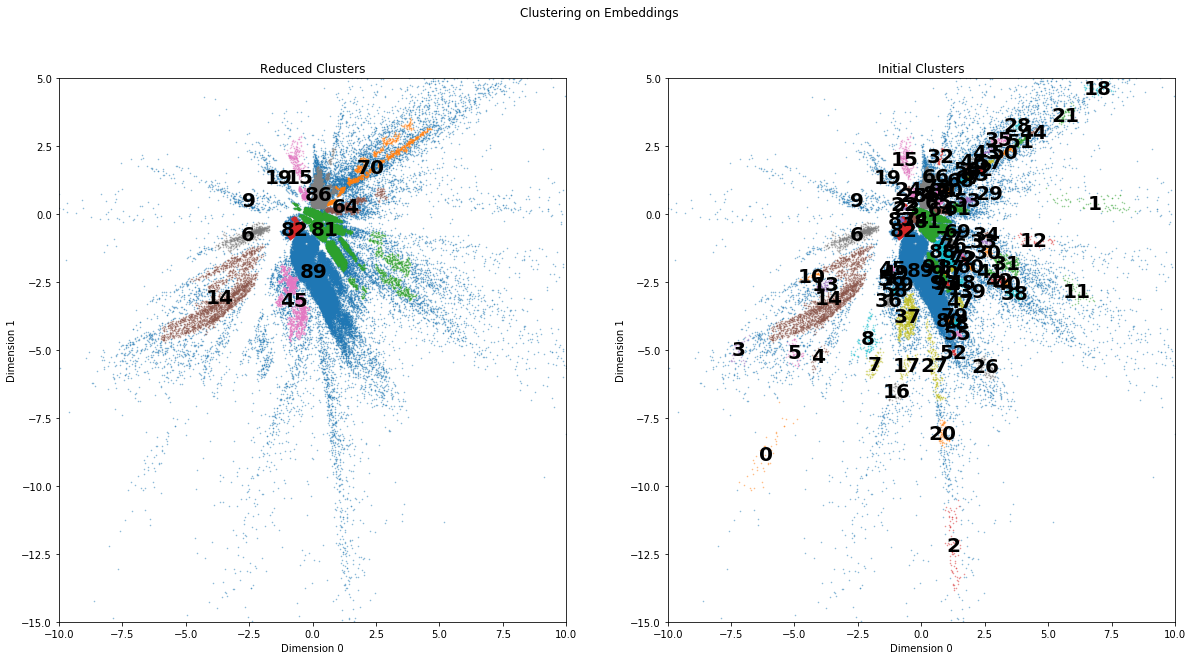

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (20,10))
fig.suptitle('Clustering on Embeddings')
for label in np.unique(labels):
    ax[0].scatter(sampled.query('labels == ' + str(label)).one,
                  sampled.query('labels == ' + str(label)).two,
                  s = 0.3, alpha = 0.5);
    ax[0].set_xlim(-10,10)
    ax[0].set_ylim(-15,5);
    
    if label != -1:
        ax[0].annotate(label, 
                       sampled.loc[sampled['labels']==label,['one','two']].mean(),
                       horizontalalignment='center',
                       verticalalignment='center',
                       size=20, weight='bold') 
ax[0].set_title('Reduced Clusters')
ax[0].set_ylabel('Dimension 1')
ax[0].set_xlabel('Dimension 0')
        
for label in np.unique(labels):
    ax[1].scatter(original_embed_clustering.query('labels == ' + str(label)).one,
                original_embed_clustering.query('labels == ' + str(label)).two,
                s = 0.3, alpha = 0.5);
    ax[1].set_xlim(-10,10)
    ax[1].set_ylim(-15,5);
    
    if label != -1:
        plt.annotate(label, 
                     original_embed_clustering.loc[original_embed_clustering['labels']==label,['one','two']].mean(),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=20, weight='bold')
ax[1].set_title('Initial Clusters')
ax[1].set_ylabel('Dimension 1')
ax[1].set_xlabel('Dimension 0');

**Scoring**

The silhouette score for the original clustering and the reduced clustering are shown below.
Based on the silhouette scores, reducing the clusters appears to potentially provide a better clustering.

In [43]:
org_score = silhouette_score(original_embed_clustering.query("labels != -1")[['one', 'two']], 
                             original_embed_clustering.query("labels != -1")['labels'])

red_score = silhouette_score(sampled.query("labels != -1")[['one', 'two']], 
                             sampled.query("labels != -1")['labels'])

print(f'The silhouette score of the original clusters is {org_score:.4f}. '
      + f'The silhouette score of the reduced clusters is {red_score:.4f}.')

The silhouette score of the original clusters is -0.0577. The silhouette score of the reduced clusters is 0.1797.


**Magnitude-Membership Analysis**

Generally, we would expect to see a nearly linearly increase in magnitude of a cluster as the membership increases.
From the magnitude-memebership plot below, the plots appear to exhibit a linear relationship.
As mentioned previously, clusters 70 and 14 appear to capture structure in the data so we will assume that they are not anomalous.
Here magnitude is measured as the sum of all pairwise distances between points within a cluster an its centriod since HDBSCAN is using euclidian distances in the clustering.

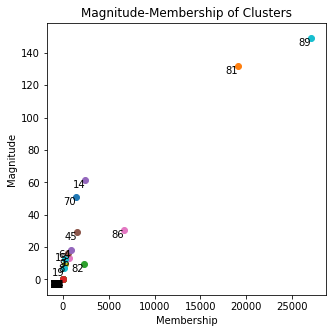

In [49]:
# drop the -1 if exists
cl = np.unique(labels)[np.unique(labels) != -1]
# pairwise distances (cluster magnitude)
magnitude = np.empty_like(cl, dtype = 'float')
card = np.empty_like(cl)

for i, label in enumerate(cl):
    # get center
    center = sampled.loc[sampled['labels']==label,['one','two']].mean().values.reshape(1,2)
    # calculate distances from center
    diff = sampled.query('labels == ' + str(label))[['one', 'two']].values - center
    card[i] = diff.shape[0]
    magnitude[i] = np.sqrt((diff * diff).sum(1).sum())

fig, ax = plt.subplots(figsize = (5, 5))
for c, m, label in zip(card, magnitude, cl):
    ax.scatter(c, m)
    ax.annotate(label, 
                 (c, m),
                 horizontalalignment='right',
                 verticalalignment='top',
                 size=10) 
ax.set_ylabel('Magnitude')
ax.set_xlabel('Membership');
ax.set_title('Magnitude-Membership of Clusters');

### Performance Comparison

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score


### Cluster Interpretation

A decision tree was used to determine the difference between the clusters.

Feature selection is a necessary first step in interpretation of the clusters because this data set contains over 300 features.
Tree-based importances were used to perform feaeture selection.
As shown in the diagram below, a random forest hyperparameter search was performed first using the cluster labels as the classification target.
Once a good set of hyperparameters were found, the data was randomly split into 10 segments and a random forest was fit on each segment.
The Gini feature importances were extracted from each model and the average importance was provided.
Weighted F1 score was used as the classification metric.

**Feature Selection Flow**

![](../_images/TreeImportances.png)

**Random Forest Feature Importance**

The following code follows the flow shown in the diagram above.
The random forests are scored with F1 score weighted by prevalence of the class for the multi-class classification of the cluster labels.

Due to memory requirements, the random parameter search is performed with 50,000 randomly selected data points which is about 17% of the data.

In [8]:
# downsample the data
data_untransformed_sampled = data.iloc[ind_plot, :].copy()

In [9]:
# estimate best model parameters with 3-fold cv scoring on weighted F1
ti = TreeImportances('f1_weighted', 3, random_state = 42, njobs = 1)

In [10]:
# only run 10 random search iterations
# use 10 models to estimate importances
ti.fit(data_untransformed_sampled.iloc[ : 50000, : ], 
       sampled['labels'].values[ : 50000],
       'random', importance_estimators = 10, n_iter = 20)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=1250, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1250, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total= 1.9min
[CV] n_estimators=1250, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV]  n_estimators=1250, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total= 2.0min
[CV] n_estimators=1250, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=1250, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total= 2.0min
[CV] n_estimators=750, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=750, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total= 4.2min
[CV] n_estimators=750, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=750, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total= 4.2min
[CV] n_estimators=750, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=750,

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 207.0min finished


Fitting on split 1.
Fitting on split 2.
Fitting on split 3.
Fitting on split 4.
Fitting on split 5.
Fitting on split 6.
Fitting on split 7.
Fitting on split 8.
Fitting on split 9.


The best parameters found by random search are shown below.

In [12]:
best_params = ti.best_parameters; print(best_params)
with open('../_pickles/autoencoder_rf_best_params', 'wb') as pkl_file:
    pickle.dump(best_params, pkl_file)

{'n_estimators': 750, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}


In [13]:
print('Reloading saved best parameters')
with open('../_pickles/autoencoder_rf_best_params', 'rb') as pkl_file:
    best_params = pickle.load(pkl_file)

Reloading saved best parameters


**Relative Feature Importance**

Once the feature importances were estimated by the random forests,
 the features were arranged by the mean feature importance in descending order
 (shown in a table below).
A plot of the relative feature importance is shown below.
The x-axis refers to the feature importance table index.

Based on the plot, the feature importance falls off rapidly and starts to flatten near 50 - 75.
The most important features (before the curve flattens) should be sufficient to descriminate between the clusters with a comparible validation score.
To verify that we can limit the cluster descrimination analysis to the 50 most important features,
 we will build a random forest classifier with only the 50 most important features and test the classification model on a holdout set.

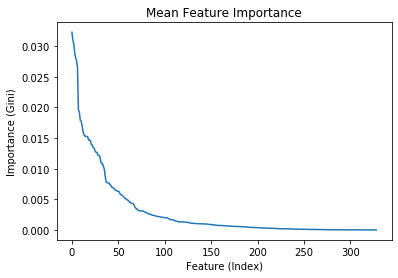

In [14]:
plt.plot(ti.importances.importance_mean);
plt.title('Mean Feature Importance');
plt.xlabel('Feature (Index)');
plt.ylabel('Importance (Gini)');

In [19]:
# write out whole table
with open("../html/tree_importances_autoencoder_embeddings.html", "w") as out_file:
    out_file.write(ti.importances.to_html(index = False))
# write out just the aggragate fields
with open("../html/mean_tree_importances_autoencoder_embeddings.html", "w") as out_file:
    out_file.write(ti.importances[['features','importance_mean','importance_sd']].to_html(index = False))
# write sorted features to pickle file
with open("../_pickles/sorted_important_features", "wb") as out_file:
    pickle.dump(ti.importances.features.values, out_file)

**Feature Importance Table**

The following table shows the feature importance mean and standard deviation for each feature in descending order.

In [13]:
IFrame("../html/mean_tree_importances_autoencoder_embeddings.html", width=980, height=400)

**Cluster Classification**



In [27]:
with open("../_pickles/sorted_important_features", "rb") as in_file:
    import_features = pickle.load(in_file)

To assess the validity of using the top 50 features, we will fit a random forest on the top 50 features and calculate the f1 score on a holdout set.
The holdout set was not used in the feature importance step.

In [23]:
rf = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                            min_samples_split = best_params['min_samples_split'],
                            min_samples_leaf = best_params['min_samples_leaf'],
                            max_features = best_params['max_features'],
                            max_depth = best_params['max_depth'],
                            bootstrap = best_params['bootstrap'],
                            random_state = random_state)
# fit a classifier on the first 50 features
rf.fit(data_untransformed_sampled[import_features[:50]].iloc[ : 50000, : ],
       sampled['labels'].values[ : 50000])
pred_labels = rf.predict(
    data_untransformed_sampled[import_features[:50]].iloc[50000 : , : ]
)

In [24]:
print('Reloading saved predictions')
with open('../_pickles/autoencoder_rf_predictions', 'rb') as pkl_file:
    pred_labels = pickle.load(pkl_file)

Reloading saved predictions


In [25]:
f1s = f1_score(sampled['labels'].values[50000 : ],
               pred_labels, average = 'weighted')
print(f'The weighted F1 score on the holdout set is {f1s:.4f}.')

The weighted F1 score on the holdout set is 0.8475.


The random forest fit with the 50 most important features scores 0.8475 weighted F1 score on the holdout data set.
This result is close to the weighted F1 score used to select the best parameters by internal cross validation (0.8441),
 providing evidence that we can procede with the top 50 features.

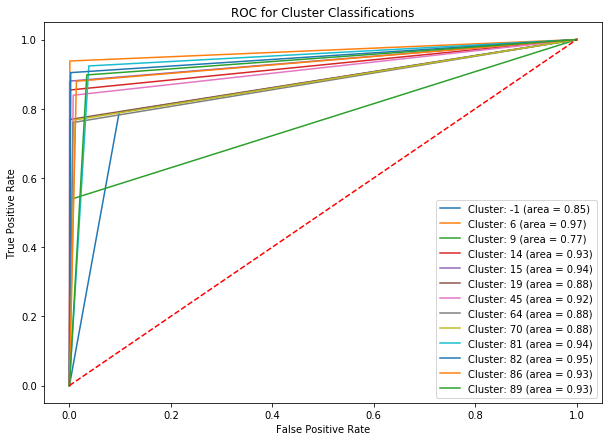

In [35]:
# binarize labels and build ROC curves for each cluster classification
binarized_labels = label_binarize(sampled['labels'].values[50000 : ],
                                  classes = np.unique(sampled['labels'].values[50000 : ]))
proba = rf.predict_proba(
    data_untransformed_sampled[import_features[:50]].iloc[50000 : , : ]
)

plt.figure(figsize = (10, 7))
for i, label in enumerate(np.unique(sampled['labels'].values[50000 : ])):

    fpr = dict() # false positive rate
    tpr = dict() # true positive rate
    roc_auc = dict() # area under the curve

    fpr, tpr, thresholds = roc_curve(np.round(proba[:, i]), binarized_labels[:, i])
    roc_auc = auc(fpr,tpr)

    plt.plot(fpr, tpr, label = 'Cluster: ' + str(label) + f' (area = {roc_auc:.2f})')
plt.legend()
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Cluster Classifications');

The ROC curves show that model appears to be capable of predicting the correct class for many of the clusters.
However, the predictive capability is not great for clusters 9, 19, 64, and 70.
The cross tabulation of predicted labels and true labels shows the misclassification details.

The model generally as difficulty classifying instances in the following ways

* Most of the cluster 9 instances are classified as cluster 81, cluster 89, or noise.
* Most of the cluster 19 instances are classified as cluster 86.
* About half of the instances from cluster 64 are classified as noise or cluster 86.
* Abount half of the instances from cluster 70 are misclassified as noise.

Additionally, the model does not have high predictive power for instance labeled as noise.
However, this is reasonable because the instances classified as noise do not have a well defined structure within the dataset.

The model misclassifications are not necessary evidence that clusters should be combined.
It is possible that there were not enough instances in the training set for the model to learn an effective decision boundary for those clusters.

In [30]:
pd.crosstab(pd.Series(sampled['labels'].values[50000 : ], name = 'True Label'),
            pd.Series(pred_labels, name = 'Predicted Label'))

Predicted Label,-1,6,9,14,15,19,45,64,70,81,82,86,89
True Label,,,,,,,,,,,,,
-1,4276,11,0,126,27,5,87,45,88,461,79,255,909
6,6,202,0,14,0,0,0,0,0,0,0,0,0
9,14,0,9,0,1,0,1,1,0,24,3,9,38
14,50,1,0,846,0,1,0,0,1,0,0,0,0
15,7,0,0,0,179,0,0,0,0,0,0,0,0
19,1,0,0,0,0,18,0,3,1,0,0,32,1
45,64,0,0,0,0,0,404,0,0,26,0,6,64
64,75,0,0,0,0,0,0,192,1,1,0,71,2
70,262,0,0,0,0,0,0,1,249,0,0,21,0


**Interpretation by Heatmap**

The differences in clusters are shown by highlighting the differences in discriminating features with a heatmap.
The mean value fo each feature grouped by cluster is shown below.

In [171]:
import pickle
import pandas as pd
data_untransformed = pd.read_csv('data_untransformed_sampled.csv')
sampled = pd.read_csv('sampled.csv')
file = 'C:\\Users\\howar\\Documents\\Machine_Learning1\\home-credit-default-risk\\_pickles\\sorted_important_features'
feature_importances = pickle.load(open(file, 'rb'))

In [172]:
top_5 = feature_importances[:5]

data_slim  = data_untransformed[list(top_5)]
data_slim = pd.concat([data_slim, sampled.labels, data_untransformed.TARGET], axis = 1)
top_5_means = data_slim.groupby('labels').mean().reset_index()

In [173]:
def plot_feature_percentage(feature):
    bars = alt.Chart(top_5_means, title = '{} vs. Noise'.format(feature)).mark_bar().encode(
        y = alt.Y('labels:N', 
              sort = alt.EncodingSortField(feature, order = 'descending')),
        x = alt.X(feature, 
              axis = alt.Axis(grid = False),
             title = feature),
        color = alt.condition(
            alt.datum.labels == -1,
            alt.value('orange'),
            alt.value('steelblue')))

    text = bars.mark_text(
        align = 'left',
        baseline = 'middle',
        dx = 6).encode(
        text = alt.Text(feature, format = '.1%'))
# 'Mean:Q'
    (bars+text).properties(height = 500, width = 450).display()
def plot_feature(feature):
    bars = alt.Chart(top_5_means, title = '{} vs. Noise'.format(feature)).mark_bar().encode(
        y = alt.Y('labels:N', 
              sort = alt.EncodingSortField(feature, order = 'descending')),
        x = alt.X(feature, 
              axis = alt.Axis(grid = False),
             title = feature),
        color = alt.condition(
            alt.datum.labels == -1,
            alt.value('orange'),
            alt.value('steelblue')))

    text = bars.mark_text(
        align = 'left',
        baseline = 'middle',
        dx = 6).encode(
        text = alt.Text(feature))
# 'Mean:Q'
    (bars+text).properties(height = 500, width = 450).display()

In [182]:
alt.renderers.enable('html')
plot_feature_percentage('TARGET')

alt.LayerChart(...)

### Interpretation

The Cluster Default Rates indicate clear patterns in loan default rates across the 12 clusters. The orange cluster labeled "-1" represents applications that did not fit into any cluster. Cluster 19 is clearly the cluster that is least likely to default on a loan, while clusters 15, 45,70, and 82 represent the most likely clusters to default. 

Although observable differences are apparent, defaulting on a loan was not among the top features the Random Forest classifier used to classify the clusters presented in the analysis. We will focus on the five most important features identified by the Random Forest classifier. 

In [175]:
plot_feature(top_5[0])

alt.LayerChart(...)

### Interpretation

This feature represents the number of days away that the first payment is due relative to the current application. Applicants who have a very large number of days intil their first payment becomes due, 42,801, are represented by cluster 81. These wide time spans are not erroneous and would require the input of subject matter experts as they are most likely due to international financial system differences. 

In [176]:
plot_feature(top_5[1])

alt.LayerChart(...)

### Interpretation

Clusters 6 and 81 have the least number of days employed, while cluster 64 has the greatest number of days employed. Aplicants from cluster 6 and 81 could be younger or perhaps females from male-dominant cultures. Cluster 64 is defined by having a significantly larger number of days employed than any other group possibly making them an older group of applicants.

In [177]:
plot_feature_percentage(top_5[2])

alt.LayerChart(...)

## Interpretation

Given that this feature is the ratio of an applicant's age to their number of days emplyed, it is not suprising that clusters 6 and 81 have the lowest percentage of their lives employed, while cluster 64 has spent most of their lives employed. These two features can be said to account for an applicant's life-experience and maturity.

In [178]:
plot_feature(top_5[3])

alt.LayerChart(...)

## Interpretation

This feature represents the first version of the number of days since the last payment was due, relative to the current application date. Again, we see very long durations, such as 365,243 days. To accurately interpret the meaning of this feature, we would need to consult with subject matter experts as we suspect this feature is strongly tied to international differences in the handling of credit and finance.

In [179]:
plot_feature_percentage(top_5[4])

alt.LayerChart(...)

## Interpretation

This indicator represents the percentage of each cluster who reported having a work phone. Clusters 14, 89, 45, and 82 all have similarly high repsonses to having an employer phone, while clusters 81 and 6, who we already konw have almost no work history, have the lowest positive repsonses to having an employer phone number.

**Description of Clusters**

In order to describe clusters, a heatmap was generated to show how the features selected by the random forest discriminate the clusters.
Each feature was normalized, then grouped by cluster.
The grouped mean of the normalized features are plotted in the heatmap below.
The y-axis is the feature name and the x-axis is the cluster label.
Each cluster is described following the heatmap.

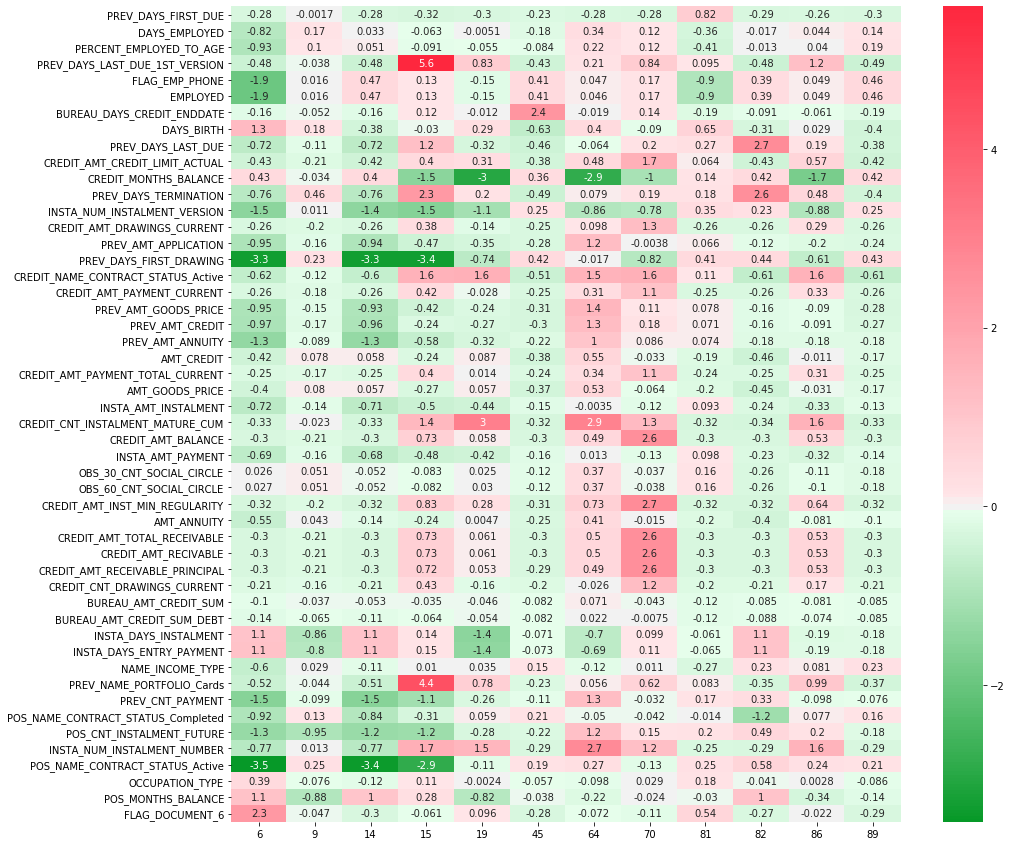

In [14]:
lister = list()

# rescale the sampled data
cluster_raw_data = pd.DataFrame(
    StandardScaler().fit_transform(
        data_untransformed_sampled[import_features[:50]].iloc[ : , : ].copy()
        ) ,
    columns = import_features[:50]
)

# generate a diverging colormap
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
divnorm = DivergingNorm(vmin=cluster_raw_data.min().min(),
                        vcenter=0,
                        vmax=cluster_raw_data.max().max())

# append the labels
cluster_raw_data['labels'] = sampled['labels']
# get the means of each feature grouped by label
grouped_by_cluster = cluster_raw_data.query('labels != -1').groupby('labels').describe()
for feature in import_features[:50]:
    lister.append(grouped_by_cluster[feature]['mean'])
# stack the column means for each cluster and plot heatmap
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(np.column_stack(lister).T, 
            ax = ax,
           xticklabels = grouped_by_cluster.index,
           yticklabels = import_features[:50],
           annot=True,
           cmap=rdgn, norm=divnorm);

#### **Well Defined Clusters**

The following cluster appear to be generally well defined by the top 50 features suggested by a random forest feature importance analysis.

* **Cluster 6**: The Retiree

Applicants in this cluster tend to be older and unemployeed.
Generally, they take out smaller loans with shorter durations (below the global average).
Previous loans appear to have been completed.
There is a tendency to have a low number of credit cards.
We believe these applicants may be retirees and pensioners.

* **Cluster 14**: The Stable Repeat Borrower

Applicants from cluster 14 appear to have similar characteristic to applicants from cluster 6, but are generally younger and tend to be employed.
They appear to take out smaller loans and previous loans have been paid off.

* **Cluster 15**: The Credit Card User

Applicants in this cluster have primarily applied for credit cards.
They are a large number of active accounts.
The accounts appear to carry above average balance and these applications owe an above average principle.
The first payment of the previous applciation was due very recently, meaning it likely just started.
Previous contracts have not been terminated yet.
We suspect these borrowers are heavy credit card users.

* **Cluster 70**: The High Roller

Applicants in this cluster in this cluster appear to be characterized by having high credit limits and taking out large loans.
Applicants receiving large loans while having a high credit limit may indicate weathly individuals.


* **Cluster 64**: The Longterm Borrower

This type of applicant tend to take out loans for large amounts, but does not have many active accounts.
Previous loans were not taken out recently.
These associations appear to indicate a longterm borrower who requests a few high value contracts.
Applicants appear to have been employed for a long period of time.

* **Cluster 86**: The Lite Longterm Borrower

This cluster appears to be a less extreme version of cluster 64.
Applicants in this cluster appear to have a take out longterm loans, but the loans are lesser in values.
Additionally, the applicants are younger than the applicants in clsuter 64.

* **Cluster 82**: Loan Compounders

Applicants from appear to be compounding loans.
They have previous loans that are due in the longterm future.
They also appear to have a large number of contracts that are still open.

* **Clsuter 89**: The Average Customer

Applicants in this cluster do not show strong associations to any features.
Number of active accounts, age, employment period, credit limit, and loan amounts appear to be near the global average.


#### **Other Clusters**

The following cluster appear to be defined by a single feature or just a few of the top 50 features suggested by a random forest feature importance analysis.
These cluster may be less useful to stakeholders.

* **Cluster 19**: Customers Nearing End of Term

Applicants in cluster 19 appear to be best associated with contracts nearing maturity.
Overall, contracts appear to be have average characterisics.

* **Cluster 81**: The Near Retiree

Applicants in this cluster tend to be slightly older than average, but are still employed - in constrast to applicants in cluster 6.
These applicants could be nearing retirement age.

* **Cluster 45**: Long Remaining CB Credit

Applicants in this cluster appear to be defined by having a long remaining duration of CB credit at the time of application.
This *feature is not well defined by the stakeholders*; therefore, it is difficult to assess the significance of this cluster.

* **Cluster 9**: Not Sufficiently Defined

This cluster does not appear to be well defined based on the given features.
We also found previously that the cluster classification model had difficulty distinguishing instances in this cluster from noise or cluster 89 (the average cluster).
This cluster also has the lowest membership.
This cluster does not appear to be useful.

#### **Interesting Correlations**

* based on the data from cluster 6, 45, nad 81, there appears to be a correlation between age and likeliness to complete document 6.



## 3.2 Option B: Association Rule Mining (Q3B)<a class="anchor" id="Rule_mining"></a>

Because of the high level of separable information gained through clustering, we elected to have a contrast between two clusters - one cluster having the highest loan default rate and one cluster having the lowest default rate. Cluster 15 is at greatest risk of defaulting on loans - at roughly 12.6% - whereas cluster 19 is at the least risk of defaulting on loans - at roughly 4.9%. There was strong separation identified between these two groups as well so the information gained can be considered highly reliable. Furthermore, to increase the relevancy of the information gained through association rule mining's identified itemsets, we used a random forest decision tree to be able to identify the influence items in each itemset provide to the uniqueness of the clusters. We then took the 125 most important features and provided itemsets based on these. Data for this analysis has been imported from Lab 2, keeping only object values.

In [7]:
cluster_labels = pd.read_csv('~/Desktop/ML7331_proj3/autoencoded_labels.csv')
df_chars = pd.read_csv('~/Desktop/proj_data/data.csv')
df_target = pd.DataFrame(df_chars['TARGET'])
df_ID = pd.DataFrame(df_chars['SK_ID_CURR'])
df_chars = df_chars.select_dtypes(include=['object'])
df_chars = pd.concat([df_ID, df_target, df_chars], axis=1)
df_data = df_chars.drop(['CODE_GENDER'], axis=1)
random_state = 42

In [8]:
pd.options.display.max_columns = None

In [9]:
df_keep_holder = cluster_labels.merge(df_data, on = "SK_ID_CURR", how = "inner")
df_keep = df_keep_holder.drop(['SK_ID_CURR'], axis=1)

df_keepers = df_keep[(df_keep['label'] == 15) | (df_keep['label'] == 19)]

df_keep_dummies = pd.get_dummies(df_keepers)

In [19]:
%%capture
y = pd.DataFrame(df_keep_dummies, columns=['label'])
X2 = df_keep_dummies.drop(['label'], axis=1)
X = pd.DataFrame(X2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X1cols = X_train.columns.tolist()
y1cols = y_train.columns.tolist()

model = RandomForestClassifier(n_estimators=100, min_samples_split = round(.15*math.sqrt(len(df_keep_dummies))), criterion="gini")

# Train
model.fit(X_train, y_train)
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,
                feature_names = X1cols,
                class_names = ['0','1'],
                rounded = True, proportion = False,
                precision = 2, filled = True,
                max_depth = 6)

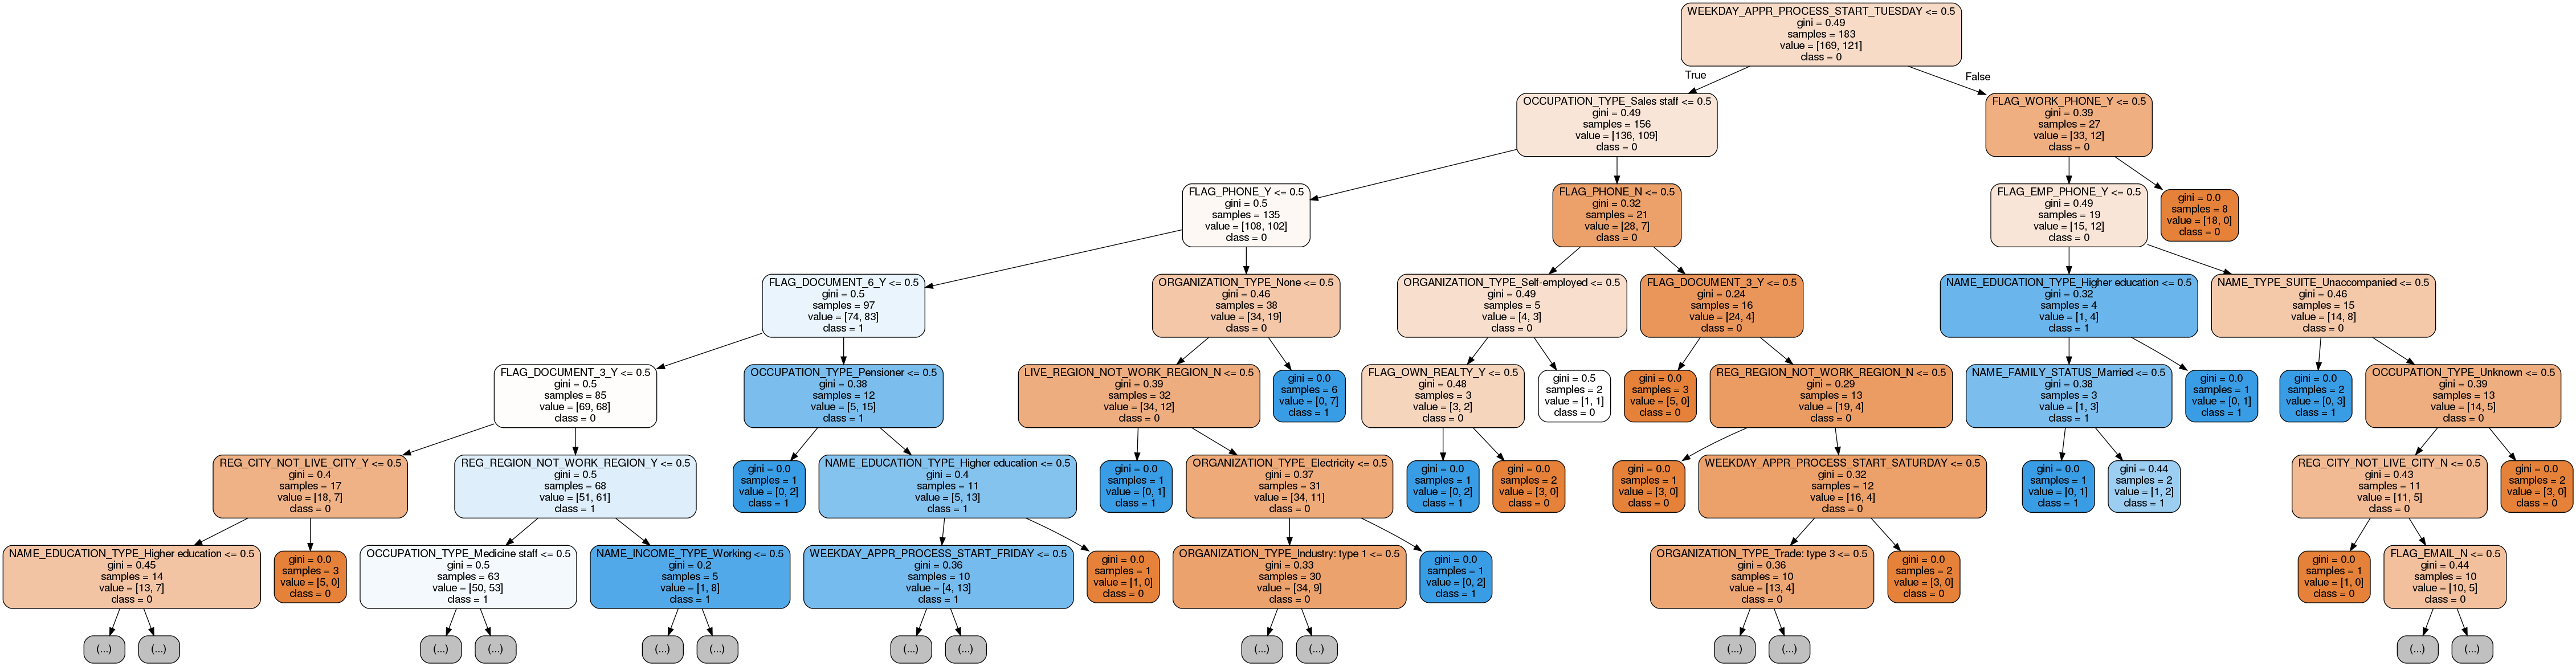

In [20]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [57]:
pd.options.display.max_rows = None
feat_labels = X_train.columns
str_holder = []

sfm = SelectFromModel(model, threshold=0.00000001)
sfm.fit(X_train, y_train.values.ravel())

for feature_list_index in sfm.get_support(indices=True):
    str_holder.append(feat_labels[feature_list_index])
    
feat_holder_fin = pd.DataFrame(str_holder, columns=['IMPORTANT_FEATURES'])

In [58]:
important_cols = feat_holder_fin['IMPORTANT_FEATURES']

In [59]:
df_keep = df_keep_dummies[important_cols]

In [60]:
df_keep_final = pd.concat([y,df_keep], axis=1)

In [61]:
df_15_final = df_keep_final[df_keep_final['label'] == 15].reset_index(drop=True)
df_19_final = df_keep_final[df_keep_final['label'] == 19].reset_index(drop=True)

In [62]:
df_151 = df_15_final.applymap(lambda x: True if x==1 else False)
df_191 = df_19_final.applymap(lambda x: True if x==1 else False)

In [63]:
df_15 = df_151.drop('label', axis=1)
df_19 = df_191.drop('label', axis=1)

In [64]:
pd.set_option('max_colwidth', 400)
cluster15 = fpgrowth(df_15, min_support=0.85, use_colnames=True, max_len = None, verbose=None)
cluster15_final = pd.DataFrame(cluster15)

In [65]:
pd.set_option('max_colwidth', 400)
cluster19 = fpgrowth(df_19, min_support=0.85, use_colnames=True, max_len = None, verbose=None)
cluster19_final = pd.DataFrame(cluster19)

In [66]:
df_15v2 = pd.merge(cluster15_final, cluster19_final, on=['itemsets'], how="outer", indicator=True).query('_merge=="left_only"').reset_index(drop=True)

In [67]:
df_cluster_15 = df_15v2.iloc[:,0:2]

In [68]:
df_cluster_15.columns = ['CLUSTER 15 SUPPORT','CLUSTER 15 ITEMSETS']

In [69]:
df_cluster_15_sorted = df_cluster_15.sort_values(by=['CLUSTER 15 SUPPORT'], ascending=False)

In [70]:
final_15 = df_cluster_15_sorted.head(10).reset_index(drop=True)

In [71]:
final_15_support = final_15.iloc[:,0]

In [72]:
final_15_nofroze = final_15.iloc[:,1].astype(str).str.replace("[({)}']","").str.replace("frozenset", "").str.split(',', expand=True)

In [73]:
final_15_df = pd.concat([final_15_support, final_15_nofroze], axis=1)

In [74]:
final_15_df.columns = ['CLUSTER 15 ITEMSET SUPPORT','CLUSTER 15 ITEM 1','CLUSTER 15 ITEM 2','CLUSTER 15 ITEM 3']

### Itemsets of associated features from the 15th cluster:

Based on the findings of association rule mining, the most important features appearing in the top 10 itemsets for cluster 15 are related to if the applicant has a work phone, an email account, document 6, document 16, document 18, and if they apply for the loan in a region different than that in which the applicant lives. The order of support in the itemsets is listed below, ordered by the most common to occur to the least, within the top 10 itemsets.

Association Rule Mining uncovers these itemsets based on specified levels of support for those itemsets where support is an identifier for the frequency of items co-occuring throughout the data.

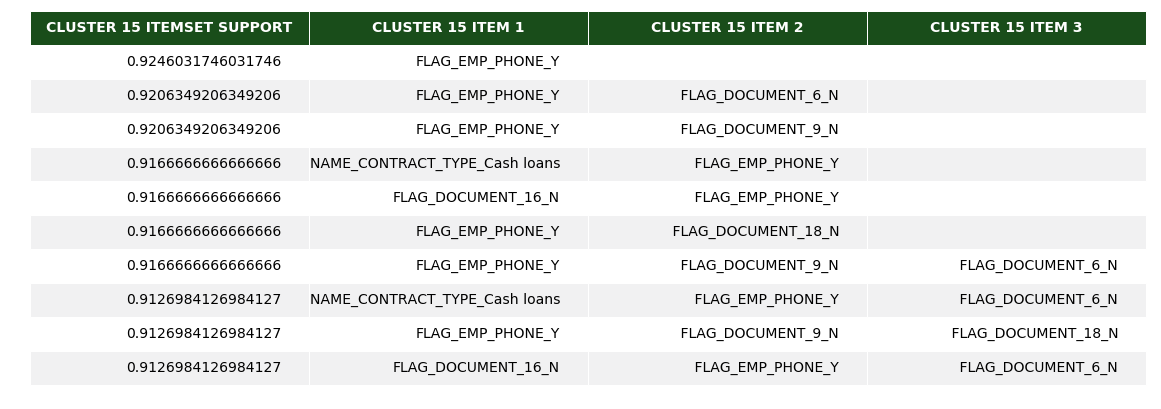

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#194d1a', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(final_15_df, header_columns=0, col_width=5.0);

In [76]:
df_19v2 = pd.merge(cluster19_final, cluster15_final, on=['itemsets'], how="outer", indicator=True).query('_merge=="left_only"').reset_index(drop=True)

In [77]:
df_cluster_19 = df_19v2.iloc[:,0:2]

In [78]:
df_cluster_19.columns = ['CLUSTER 19 SUPPORT','CLUSTER 19 ITEMSETS']

In [79]:
df_cluster_19_sorted = df_cluster_19.sort_values(by=['CLUSTER 19 SUPPORT'], ascending=False)

In [80]:
final_19 = df_cluster_19_sorted.head(10).reset_index(drop=True)

In [81]:
final_19_support = final_19.iloc[:,0]

In [82]:
final_19_nofroze = final_19.iloc[:,1].astype(str).str.replace("[({)}']","").str.replace("frozenset", "").str.split(',', expand=True)

In [83]:
final_19_df = pd.concat([final_19_support, final_19_nofroze], axis=1)

In [84]:
final_19_df.columns = ['CLUSTER 19 ITEMSET SUPPORT','CLUSTER 19 ITEM 1','CLUSTER 19 ITEM 2','CLUSTER 19 ITEM 3','CLUSTER 19 ITEM 4']

### Itemsets of associated features from the 19th cluster:

Based on the findings of association rule mining, the most important features appearing in the top 10 itemsets for cluster 19 are related to if the applicant lives in an apartment or a house, whether or not they have document 11, document 16, document 18, and are applying for a cash loan. The order of support in the itemsets is listed below, order by the most common to occur to the least, within the top 10 itemsets.

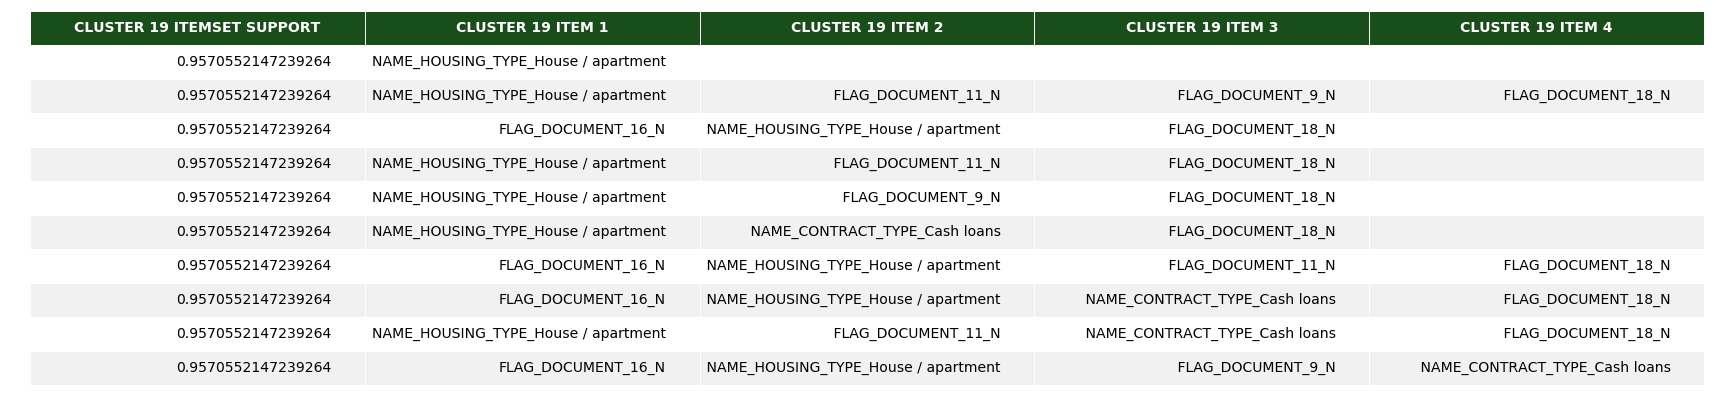

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#194d1a', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(final_19_df, header_columns=0, col_width=6.0);

# 4. Stage Five - Deployment (Q3) <a class="anchor" id="Deployment"></a>

## 4.1 Next Stage Deployment <a class="anchor" id="Deployment"></a>

The next stage in the CRISP-DM is deployment. After model building and evaluation, we are ready to create the model in H2O which will allow us to save the model as a MOJO (Model Object, Optimized) binary. H2O allows you to convert models that you build to MOJOs, which can then be deployed for scoring in real time.The "download_mojo()" function saves the model as a zip file. You can unzip the file to view the options used to build the file along with each tree built in the model. Note that each tree file is saved as a binary file type. This MOJO zip allows us to deploy our code representation of the model into a production environment and solve our original business problem. The diagram below represents the flow for the training and deployment of our model.

<img src="../_images/MachineLearning-Lab3_System.png" style="width:800px;height:375px"/>

#### How useful is your model for interested parties?<a class="anchor" id="Useful"></a>

We believe this model would be useful for loan departments loan evaluators. This is contingent of discovering how some of the external variables are created. With this and some additional consistancy in top scoring features we could improve the accuracy

#### How would you measure the model's value if it was used by these parties?<a class="anchor" id="Value"></a>

This model should be tested in parrellel to present evaluation proceess. Then after a set period of time compare human evaluation to model based accuracy. If the results were the same, the minimum resulting savings would be the salaries of the loan evaluators. Added value would result from the acceleration of the loan approval process.

#### How would your deploy your model for interested parties?<a class="anchor" id="Deploy"></a>

Our MOJO zip file will be sent to the loan approval department. During the loan approval, the preporcessed collected data be digested by our deployed compiled model.

#### How often would the model need to be updated?<a class="anchor" id="Update"></a>

The metrics for the customer is continually updated. On a scheduled cycle, this new dataset is analyzed through the current model flow above. The new MOJO zip file will be deployed to the loan departments. Doing batch cycles will allow for consistency in whether an applicant is approved or not.  However, model designs will change as newer technology are available or changing business environments make reengineering required.

#### What other data should be collected?<a class="anchor" id="Collect"></a>

In addition to the clarification of data we have described above, there would be a tremendous value in the financials for the industry that the individual is working. These financials could assist in prediction of any future concerns for the applicants present income.

Below is a typical example of code that would enable the creation of the model in H2O and the creation of the MOJO zip file for compiling into a runtime module.

## Sample of H2O deployment

### Load and Run H2O Engine

In [1]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
print("Start H2O service")
h2o.init(nthreads = -1)

Start H2O service
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "13.0.2" 2020-01-14; Java(TM) SE Runtime Environment (build 13.0.2+8); Java HotSpot(TM) 64-Bit Server VM (build 13.0.2+8, mixed mode, sharing)
  Starting server from /opt/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/4b/r115yf2s71z5v2rs2mx3qhmh0000gn/T/tmpv347ww2w
  JVM stdout: /var/folders/4b/r115yf2s71z5v2rs2mx3qhmh0000gn/T/tmpv347ww2w/h2o_melschwan_started_from_python.out
  JVM stderr: /var/folders/4b/r115yf2s71z5v2rs2mx3qhmh0000gn/T/tmpv347ww2w/h2o_melschwan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_melschwan_6nq0sg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


### Load previously cleaned datasets

In [4]:
# Reload previous generated datasets.

print('Reloading saved best datasets')
with open("../_pickles/sorted_important_features", "rb") as in_file:
    import_features = pickle.load(in_file)
with open('../_pickles/autoencoder_rf_best_params', 'rb') as pkl_file:
    best_params = pickle.load(pkl_file)
data_untransformed_sampled = pd.read_csv('../_data/data_untransformed_sampled.csv')    
sampled = pd.read_csv('../_data/sampled.csv')


Reloading saved best datasets


### Convert datasets to H2O data frame format and upload to H2O

In [5]:
data_untransformed_sampled_x = data_untransformed_sampled[import_features[:50]].iloc[ : 50000, : ]
data_untransformed_sampled_hex = h2o.H2OFrame(data_untransformed_sampled_x)
sampled_y = sampled['labels'].values[ : 50000]
sampled_y_hex = h2o.H2OFrame(sampled_y)
best_params = sampled['labels'].values[ : 50000]
best_params = h2o.H2OFrame(best_params)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


### Create H2O model  and train

* NOTE: Could not find H2O equivalent model to SKLEARN RandomForestClassifier so code below is just a template

In [ ]:
# Define model
rf = H2ORandomForestEstimator(ntrees=50, max_depth=20, nfolds=10)

# Train model
training_columns = import_features
response_column = 'labels'
model.train(x=training_columns, y=response_column, training_frame=train)

### Save the H2O model to MOJO

In [ ]:
# save the model
model_path = h2o.save_model(model=model, path="/tmp/mymodel", force=True)

In [ ]:
### Import MOJO model and make predictions off of new applicant data

In [ ]:
path = '/tmp/mymodel/model.zip'
original_model.download_mojo(path)
# Import MOJO model
imported_model = h2o.import_mojo(path)
new_observations = h2o.import_file(path='new_applicant_data.csv')
predictions = imported_model.predict(new_observations)